In [88]:
import requests
import nltk
res = requests.get('https://www.gutenberg.org/cache/epub/2264/pg2264.txt')
html_page = res.text

In [89]:
from nltk.tokenize import word_tokenize, sent_tokenize
token_txt = sent_tokenize(html_page)
words = []
for s in token_txt:
    for w in word_tokenize(s):
        words.append(w)

In [90]:
from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')
myStopWords = list(punctuation) + stopwords.words('english')
wordsNoStop = []
for i in words:
    if i not in myStopWords:
        wordsNoStop.append(i)

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [91]:
from nltk.stem import WordNetLemmatizer
macBethWords = [WordNetLemmatizer().lemmatize(w) for w in wordsNoStop]

In [92]:
from collections import Counter
import pandas as pd
df = pd.DataFrame.from_dict(Counter(macBethWords),orient="index").reset_index().rename(columns={'index':'word',0:'count'})
dfMean = df['count'].mean()
dfMedian = df['count'].median()
dfMode = df['count'].mode()

In [93]:
print("Mean = " + str(dfMean))

Mean = 3.0616468516072213


In [94]:
print("Median = " + str(dfMedian))

Median = 1.0


In [95]:
print("Mode = " + str(dfMode[0]))

Mode = 1


In [96]:
from scipy import stats
print("Trimmed Mean = ")
stats.trim_mean(df['count'], 0.1)
#calculate 10% trimmed mean

Trimmed Mean = 


1.5594386351128233

In [99]:
df['count'].plot(kind='hist',
                 bins=25,
                 color= red,
                 title='Word Frequency in MacBeth')

NameError: name 'red' is not defined

In [98]:
StD = df['count'].std()
Percent25 = df['count'].quantile(0.25)
Percent75 = df['count'].quantile(0.75)

In [30]:
print("Standard Deviation = " + str(StD))

Standard Deviation = 9.339998576867185


In [31]:
print("25% Quantile = " + str(Percent25))

25% Quantile = 1.0


In [33]:
print("75% Quantile = " + str(Percent75))

75% Quantile = 2.0


In [34]:
print("Interquartile Range = " + str(Percent75-Percent25))

Interquartile Range = 1.0


### Comments:
A standard deviation of 9 seems to be a reasonable calculation since the data seems to collect in one area but still has range. The histogram seems to be skewed to the left. The data measurements of mean, median, and mode also reflect these quartiles because it seemed as though much of the data lied around 1 and 2, and the interquartile range is at 1, with the 25% quantile at 1 and the 75% quantile at 2.

In [35]:
from sklearn import datasets
df = datasets.load_diabetes(as_frame=True) 
features_df = df.data
target_df = df.target

In [36]:
print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [37]:
for c in features_df.columns:
    print(c)

age
sex
bmi
bp
s1
s2
s3
s4
s5
s6


In [38]:
features_df.mean()

age   -3.634285e-16
sex    1.308343e-16
bmi   -8.045349e-16
bp     1.281655e-16
s1    -8.835316e-17
s2     1.327024e-16
s3    -4.574646e-16
s4     3.777301e-16
s5    -3.830854e-16
s6    -3.412882e-16
dtype: float64

In [39]:
features_df.median()

age    0.005383
sex   -0.044642
bmi   -0.007284
bp    -0.005671
s1    -0.004321
s2    -0.003819
s3    -0.006584
s4    -0.002592
s5    -0.001948
s6    -0.001078
dtype: float64

In [40]:
features_df.mode()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.016281,-0.044642,-0.030996,-0.040099,-0.037344,-0.001001,-0.013948,-0.039493,-0.018118,0.003064
1,NaN,NaN,-0.024529,-0.005671,-0.007073,0.016222,NaN,NaN,NaN,NaN


In [41]:
# find highest correlation coefficient
import numpy as np
for c in features_df.columns:
    print("column: " + c)
    print(np.corrcoef(features_df[c],target_df))

column: age
[[1.         0.18788875]
 [0.18788875 1.        ]]
column: sex
[[1.       0.043062]
 [0.043062 1.      ]]
column: bmi
[[1.         0.58645013]
 [0.58645013 1.        ]]
column: bp
[[1.         0.44148385]
 [0.44148385 1.        ]]
column: s1
[[1.         0.21202248]
 [0.21202248 1.        ]]
column: s2
[[1.         0.17405359]
 [0.17405359 1.        ]]
column: s3
[[ 1.         -0.39478925]
 [-0.39478925  1.        ]]
column: s4
[[1.         0.43045288]
 [0.43045288 1.        ]]
column: s5
[[1.         0.56588343]
 [0.56588343 1.        ]]
column: s6
[[1.         0.38248348]
 [0.38248348 1.        ]]


In [42]:
#bmi appears to have highest correlation coefficient

<AxesSubplot:title={'center':'BMI vs Targets'}, xlabel='bmi', ylabel='targets'>

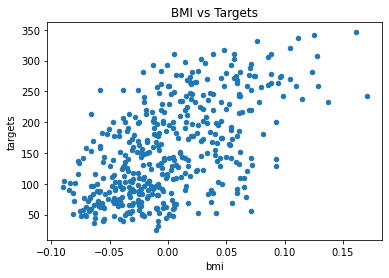

In [70]:
bmiDF = pd.DataFrame(data = {'targets':df.target,'bmi':df.data['bmi']})
bmiDF.plot(kind='scatter',
             x='bmi',
             y='targets',
             title="BMI vs Targets")

In [71]:
from sklearn.linear_model import LinearRegression
bmiLi = bmiDF[['bmi']]
targetLi = bmiDF['targets']
reg = LinearRegression().fit(bmiLi,targetLi)

In [79]:
print(reg.coef_)

[949.43526038]


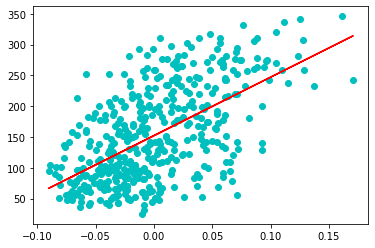

In [80]:
import matplotlib.pyplot as plt
y_train = reg.intercept_ + reg.coef_*bmiLi
plt.plot(bmiLi,targetLi,'co',bmiLi,y_train,'red')

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
mean_squared_error(targetLi,y_train)

3890.4565854612724

In [83]:
r2_score(targetLi, y_train)

0.3439237602253803

In [84]:
bpDF = pd.DataFrame(data= {"bp":df.data['bp'],"targets":df.target})
bpLi = bpDF[['bp']]
Lreg = LinearRegression().fit(bpLi,targetLi)
new_y_train = Lreg.intercept_ + Lreg.coef_*bpLi

In [85]:
mean_squared_error(targetLi,new_y_train)

4774.1029574417935

In [86]:
r2_score(targetLi,new_y_train)

0.19490798886682947

### Comments:
Comparing the Blood Pressure DataFrame to the BMI DataFrame showed interesting results. It seemed that the mean square error increased by about 900 and the r2 score decreased by almost half.